# Phase B Scaled Grid: Mode Comparison at Layer 25

This notebook visualizes intervention effects computed from Phase B results in `vm_results/phase_b_scaled`.

Data flow:
1. `07_phase_b_scaled_stats.ipynb` loads runs and writes:
   - `evaluation/outputs/phase_b_scaled/phase_b_scaled_stats.csv` (Add/Lesion)
   - `evaluation/outputs/phase_b_scaled/rescue_triplet_stats.csv` (Rescue triplets)
2. This notebook loads those CSVs and visualizes:
   - **Add**: Positive dose-dependent effects (sufficiency)
   - **Lesion**: Negative dose-dependent effects (necessity)
   - **Rescue**: Recovery toward original baseline (triplet format)
   - For both localities: COT and Answer.

In [2]:
import sys
sys.path.insert(0, '../..')

from pathlib import Path

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.colors import TwoSlopeNorm
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

# Output directory for figures
OUTPUT_DIR = Path('../outputs/phase_b_scaled')
OUTPUT_DIR.mkdir(parents=True, exist_ok=True)

# Set up clean plotting style
plt.rcParams.update({
    'figure.figsize': (16, 8),
    'font.family': 'sans-serif',
    'font.sans-serif': ['Arial', 'Helvetica', 'DejaVu Sans'],
    'font.size': 12,
    'axes.titlesize': 14,
    'axes.labelsize': 12,
    'xtick.labelsize': 11,
    'ytick.labelsize': 11,
    'axes.spines.top': False,
    'axes.spines.right': False,
    'figure.dpi': 100,
    'savefig.dpi': 300,
    'savefig.bbox': 'tight',
    'savefig.pad_inches': 0.2,
})

print('Setup complete!')

Setup complete!


## 2. Load Statistics Data

Load both paired stats (Add/Lesion) and rescue triplet stats.

In [3]:
# Load paired stats (Add/Lesion)
PAIRED_STATS_PATH = OUTPUT_DIR / 'phase_b_scaled_stats.csv'
if not PAIRED_STATS_PATH.exists():
    raise FileNotFoundError(f"Stats file not found: {PAIRED_STATS_PATH}. Run 07_phase_b_scaled_stats.ipynb first.")

paired_stats = pd.read_csv(PAIRED_STATS_PATH)
print(f"Loaded paired stats: {len(paired_stats)} rows from {PAIRED_STATS_PATH}")

# Load rescue triplet stats
RESCUE_STATS_PATH = OUTPUT_DIR / 'rescue_triplet_stats.csv'
if RESCUE_STATS_PATH.exists():
    rescue_stats = pd.read_csv(RESCUE_STATS_PATH)
    print(f"Loaded rescue triplet stats: {len(rescue_stats)} rows from {RESCUE_STATS_PATH}")
else:
    print(f"Warning: Rescue triplet stats not found at {RESCUE_STATS_PATH}")
    rescue_stats = pd.DataFrame()

# Rename columns for plotting
paired_stats = paired_stats.rename(columns={'param_value': 'param', 'delta_mean': 'delta'})
paired_stats['param'] = paired_stats['param'].astype(float)

localities = sorted(paired_stats['locality'].unique())
print(f"\nLocalities: {localities}")

# Display summaries
print("\n=== Paired Stats (Add/Lesion) ===")
display(paired_stats)

if not rescue_stats.empty:
    print("\n=== Rescue Triplet Stats ===")
    display(rescue_stats)

Loaded paired stats: 12 rows from ../outputs/phase_b_scaled/phase_b_scaled_stats.csv
Loaded rescue triplet stats: 6 rows from ../outputs/phase_b_scaled/rescue_triplet_stats.csv

Localities: ['answer', 'cot']

=== Paired Stats (Add/Lesion) ===


,mode,layer,param,param_type,locality,n,delta,delta_median,mcnemar_p,mcnemar_net_gain,wilcoxon_p,sign_p,ttest_p
0,add,25,0.5,alpha,answer,100,0.05,0.0,1.796875e-01,5,1.796875e-01,1.796875e-01,9.575263e-02
1,add,25,1.0,alpha,answer,100,0.13,0.0,9.765625e-04,13,7.891130e-04,9.765625e-04,6.003468e-04
2,add,25,2.0,alpha,answer,100,0.27,0.0,1.117587e-07,27,5.337264e-07,1.117587e-07,9.264669e-08
3,add,25,0.5,alpha,cot,100,0.12,0.0,4.180908e-03,12,2.699796e-03,4.180908e-03,2.303966e-03
4,add,25,1.0,alpha,cot,100,0.10,0.0,6.347656e-03,10,6.347656e-03,6.347656e-03,3.415508e-03
5,add,25,2.0,alpha,cot,100,0.27,0.0,1.490116e-08,27,2.034555e-07,1.490116e-08,2.575595e-08
6,lesion,25,0.5,gamma,answer,100,-0.12,0.0,4.882812e-04,-12,4.882812e-04,4.882812e-04,3.873122e-04
7,lesion,25,1.0,gamma,answer,100,-0.19,0.0,3.814697e-06,-19,1.307185e-05,3.814697e-06,5.210966e-06
8,lesion,25,2.0,gamma,answer,100,-0.30,0.0,1.862645e-09,-30,4.320463e-08,1.862645e-09,3.071123e-09
9,lesion,25,0.5,gamma,cot,100,-0.12,0.0,4.180908e-03,-12,2.699796e-03,4.180908e-03,2.303966e-03



=== Rescue Triplet Stats ===


,mode,layer,param_value,param_type,locality,gamma,n,acc_original,acc_lesion,acc_rescue,delta_lesion,delta_rescue,recovery_rate,mcnemar_lesion_p,mcnemar_rescue_p,full_recovery
0,rescue,25,0.5,beta,answer,1.0,100,0.66,0.46,0.60,-0.20,0.14,0.700000,1.096725e-05,5.187988e-04,1
1,rescue,25,1.0,beta,answer,1.0,100,0.59,0.38,0.76,-0.21,0.38,1.809524,9.536743e-07,7.457857e-11,11
2,rescue,25,2.0,beta,answer,1.0,100,0.63,0.43,0.82,-0.20,0.39,1.950000,1.907349e-06,2.153229e-10,13
3,rescue,25,0.5,beta,cot,1.0,100,0.74,0.45,0.65,-0.29,0.20,0.689655,1.308508e-07,1.096725e-05,12
4,rescue,25,1.0,beta,cot,1.0,100,0.70,0.46,0.72,-0.24,0.26,1.083333,8.046627e-07,8.679926e-07,12
5,rescue,25,2.0,beta,cot,1.0,100,0.64,0.40,0.92,-0.24,0.52,2.166667,1.192093e-07,4.440892e-16,21


## 3. Plotting Functions

In [34]:
def format_pvalue(p: float) -> str:
    """Format p-value for display."""
    if pd.isna(p):
        return 'p=N/A'
    elif p < 0.001:
        return 'p<.001'
    elif p < 0.01:
        return f'p={p:.3f}'
    else:
        return f'p={p:.2f}'


def get_significance_stars(p: float) -> str:
    """Return significance stars based on p-value."""
    if pd.isna(p):
        return ''
    elif p < 0.001:
        return '***'
    elif p < 0.01:
        return '**'
    elif p < 0.05:
        return '*'
    else:
        return ''


def plot_add_lesion_grid(
    data: pd.DataFrame,
    locality: str,
    layer: int = 25,
    baseline_acc: float = 0.65,
    title: str = None,
    save_path: Path | None = None,
    figsize: tuple = (20, 10)
) -> plt.Figure:
    """Create a 1×2 grid showing Add and Lesion effects with full annotations.
    
    Delta Accuracy = Intervention Accuracy − Baseline Accuracy
    P-values from McNemar's test (paired binary outcomes)
    """
    modes = ['add', 'lesion']
    mode_labels = {'add': 'Add (α)', 'lesion': 'Lesion (γ)'}
    params_cfg = [0.5, 1.0, 2.0]

    data_loc = data[(data['locality'] == locality) & (data['layer'] == layer)]
    if data_loc.empty:
        raise ValueError(f"No data for locality={locality}, layer={layer}")

    # Find global min/max for consistent color scale
    vmin = data_loc['delta'].min()
    vmax = data_loc['delta'].max()
    abs_max = max(abs(vmin) if not pd.isna(vmin) else 0, abs(vmax) if not pd.isna(vmax) else 0)
    if abs_max == 0:
        abs_max = 0.1

    fig = plt.figure(figsize=figsize)
    gs = gridspec.GridSpec(1, len(modes) + 1, width_ratios=[1] * len(modes) + [0.1], wspace=0.25)

    cmap = sns.diverging_palette(10, 130, as_cmap=True)
    norm = TwoSlopeNorm(vmin=-abs_max, vcenter=0, vmax=abs_max)

    for col_idx, mode in enumerate(modes):
        ax = fig.add_subplot(gs[0, col_idx])
        cell_data = data_loc[data_loc['mode'] == mode]

        values = []
        pvalues = []
        for p in params_cfg:
            row = cell_data[cell_data['param'] == p]
            if len(row) > 0:
                values.append(row['delta'].values[0] if not pd.isna(row['delta'].values[0]) else 0.0)
                pvalues.append(row['mcnemar_p'].values[0] if 'mcnemar_p' in row.columns else np.nan)
            else:
                values.append(0.0)
                pvalues.append(np.nan)

        heatmap_data = np.array([values])
        im = ax.imshow(heatmap_data, cmap=cmap, norm=norm, aspect='auto')

        # Add value annotations with p-values
        for i, (val, pval) in enumerate(zip(values, pvalues)):
            text_color = 'white' if abs(val) > abs_max * 0.5 else 'black'
            stars = get_significance_stars(pval)
            is_significant = pval < 0.05 if not pd.isna(pval) else False

            # Delta value with stars (bold if significant)
            delta_text = f'{val:+.2f}{stars}'
            fontweight = 'bold' if is_significant else 'semibold'
            ax.text(i, 0.0, delta_text, ha='center', va='center',
                    fontsize=20, color=text_color, fontweight=fontweight)

            # P-value below (bold if significant)
            # pval_text = format_pvalue(pval)
            # pval_fontweight = 'bold' if is_significant else 'normal'
            # pval_fontsize = 25 if is_significant else 9
            # ax.text(i, 0.25, pval_text, ha='center', va='center',
            #         fontsize=pval_fontsize, color=text_color, fontweight=pval_fontweight)

        ax.set_xticks(range(len(params_cfg)))
        ax.set_yticks([])
        ax.set_xticklabels([str(p) for p in params_cfg], fontsize=20)
        ax.set_xlabel('Parameter Value (α / γ)', fontsize=20)
        ax.set_title(mode_labels[mode], fontsize=30, fontweight='bold', pad=12)

        if col_idx == 0:
            ax.set_ylabel(f'Layer {layer}', fontsize=25, fontweight='bold')

        for spine in ax.spines.values():
            spine.set_visible(True)
            spine.set_linewidth(0.5)
            spine.set_color('#cccccc')

    # Add colorbar
    cbar_ax = fig.add_subplot(gs[0, -1])
    cbar = fig.colorbar(im, cax=cbar_ax)
    cbar.set_label('Δ Answer Accuracy\n(Intervention − Baseline)', fontsize=11, labelpad=12)
    cbar.ax.tick_params(labelsize=10)

    # Title
    if title is None:
        title = f'{locality.upper()} Locality: Add/Lesion Effects at Layer {layer}'
    fig.suptitle(title, fontsize=30, fontweight='bold', y=1.05)

    # # Subtitle with explanation
    # subtitle = (
    #     f'Baseline Accuracy: {baseline_acc:.1%}\n'
    #     'Δ = Intervention Accuracy − Baseline Accuracy\n'
    #     "p-values: McNemar's Test | * p<0.05, ** p<0.01, *** p<0.001 | Bold = Significant"
    # )
    # fig.text(0.5, 0.95, subtitle, ha='center', fontsize=10, style='italic', color='#555555')

    plt.tight_layout(rect=[0, 0, 1, 0.85])

    if save_path is not None:
        fig.savefig(save_path, dpi=300, bbox_inches='tight', facecolor='white')
        print(f"Saved to {save_path}")

    return fig


print("Add/Lesion plotting function defined.")

Add/Lesion plotting function defined.


In [48]:
def plot_rescue_triplet(
    data: pd.DataFrame,
    locality: str,
    baseline_acc: float = 0.65,
    title: str = None,
    save_path: Path | None = None,
    figsize: tuple = (16, 12)
) -> plt.Figure:
    """Create rescue triplet visualization showing original, lesion, rescue accuracies.
    
    Shows:
    - Original baseline as dashed horizontal line
    - Bars for lesion (degraded) and rescue (recovered) at each beta
    - Recovery rate annotations
    - P-values for rescue effectiveness
    """
    loc_data = data[data['locality'] == locality].copy()
    if loc_data.empty:
        print(f"No rescue data for locality={locality}")
        return None
    
    betas = sorted(loc_data['param_value'].unique())
    n_betas = len(betas)
    
    fig, ax = plt.subplots(figsize=figsize)
    
    # Get original baseline (should be same across betas)
    original_acc = loc_data['acc_original'].mean()
    
    # Plot original baseline as dashed line
    ax.axhline(y=original_acc, color='#2E86AB', linestyle='--', linewidth=2.5, 
               label=f'Original Baseline ({original_acc:.1%})', zorder=3)
    
    # Bar positions
    x = np.arange(n_betas)
    width = 0.35
    
    lesion_accs = []
    rescue_accs = []
    recovery_rates = []
    rescue_pvals = []
    
    for beta in betas:
        row = loc_data[loc_data['param_value'] == beta]
        if len(row) > 0:
            lesion_accs.append(row['acc_lesion'].values[0])
            rescue_accs.append(row['acc_rescue'].values[0])
            recovery_rates.append(row['recovery_rate'].values[0])
            rescue_pvals.append(row['mcnemar_rescue_p'].values[0])
        else:
            lesion_accs.append(np.nan)
            rescue_accs.append(np.nan)
            recovery_rates.append(np.nan)
            rescue_pvals.append(np.nan)
    

#     custom_incorrect = "#953834"
# custom_correct = "#75923d"
    # Plot bars
    bars_lesion = ax.bar(x - width/2, lesion_accs, width, label='Lesioned', 
                          color='#fcaeae', alpha=0.85, edgecolor='black', linewidth=0.8)
    bars_rescue = ax.bar(x + width/2, rescue_accs, width, label='Rescued', 
                          color='#c7e9c0', alpha=0.85, edgecolor='black', linewidth=0.8)
    
    # Add annotations
    for i, (beta, lesion_acc, rescue_acc, recovery, pval) in enumerate(zip(
        betas, lesion_accs, rescue_accs, recovery_rates, rescue_pvals
    )):
        # Lesion accuracy label
        if not pd.isna(lesion_acc):
            ax.text(i - width/2, lesion_acc - 0.04, f'{lesion_acc:.1%}', 
                    ha='center', va='bottom', fontsize=25, fontweight='semibold')
        
        # Rescue accuracy and recovery rate
        if not pd.isna(rescue_acc):
            stars = get_significance_stars(pval)
            is_sig = pval < 0.05 if not pd.isna(pval) else False
            fontweight = 'bold' if is_sig else 'semibold'
            
            # Accuracy label
            ax.text(i + width/2, rescue_acc - 0.06, f'{rescue_acc:.1%}{stars}', 
                    ha='center', va='bottom', fontsize=25, fontweight=fontweight)
            
            # Recovery rate below bars
            # if not pd.isna(recovery):
            #     recovery_text = f'Recovery: {recovery:.0%}' if recovery <= 1.5 else f'Recovery: >150%'
            #     ax.text(i, -0.07, recovery_text, ha='center', va='top', fontsize=10, 
            #             color='#555555', style='italic',
            #             transform=ax.get_xaxis_transform())
    
    # Styling
    ax.set_xticks(x)
    ax.set_xticklabels([f'β = {b}' for b in betas], fontsize=20)
    ax.set_xlabel('Rescue Strength (β)', fontsize=20)
    ax.set_ylabel('Accuracy', fontsize=20)
    ax.set_ylim(0, 1.05)
    ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.0%}'))
    ax.legend(loc='upper left', fontsize=25, framealpha=0.95)
    ax.grid(axis='y', alpha=0.3, linestyle='--')
    
    # Title
    if title is None:
        title = f'{locality.upper()} Locality: Rescue Triplet at γ=1.0'
    ax.set_title(title, fontsize=30, fontweight='bold', pad=15)
    
    # Subtitle with explanation
    # subtitle = (
    #     f'Baseline Accuracy: {baseline_acc:.1%} | Lesion γ=1.0\n'
    #     'Dashed line = Original baseline | Bars = Lesioned vs Rescued accuracy\n'
    #     "p-values: McNemar's Test | * p<0.05, ** p<0.01, *** p<0.001"
    # )
    # fig.text(0.52, 0.02, subtitle, ha='center', fontsize=10, style='italic', color='#555555')
    
    plt.tight_layout(rect=[0, 0.08, 1, 1])
    
    if save_path is not None:
        fig.savefig(save_path, dpi=300, bbox_inches='tight', facecolor='white')
        print(f"Saved to {save_path}")
    
    return fig


print("Rescue triplet plotting function defined.")

Rescue triplet plotting function defined.


## 4. COT Locality: Add/Lesion

Saved to ../outputs/phase_b_scaled/mode_comparison_cot_locality.pdf


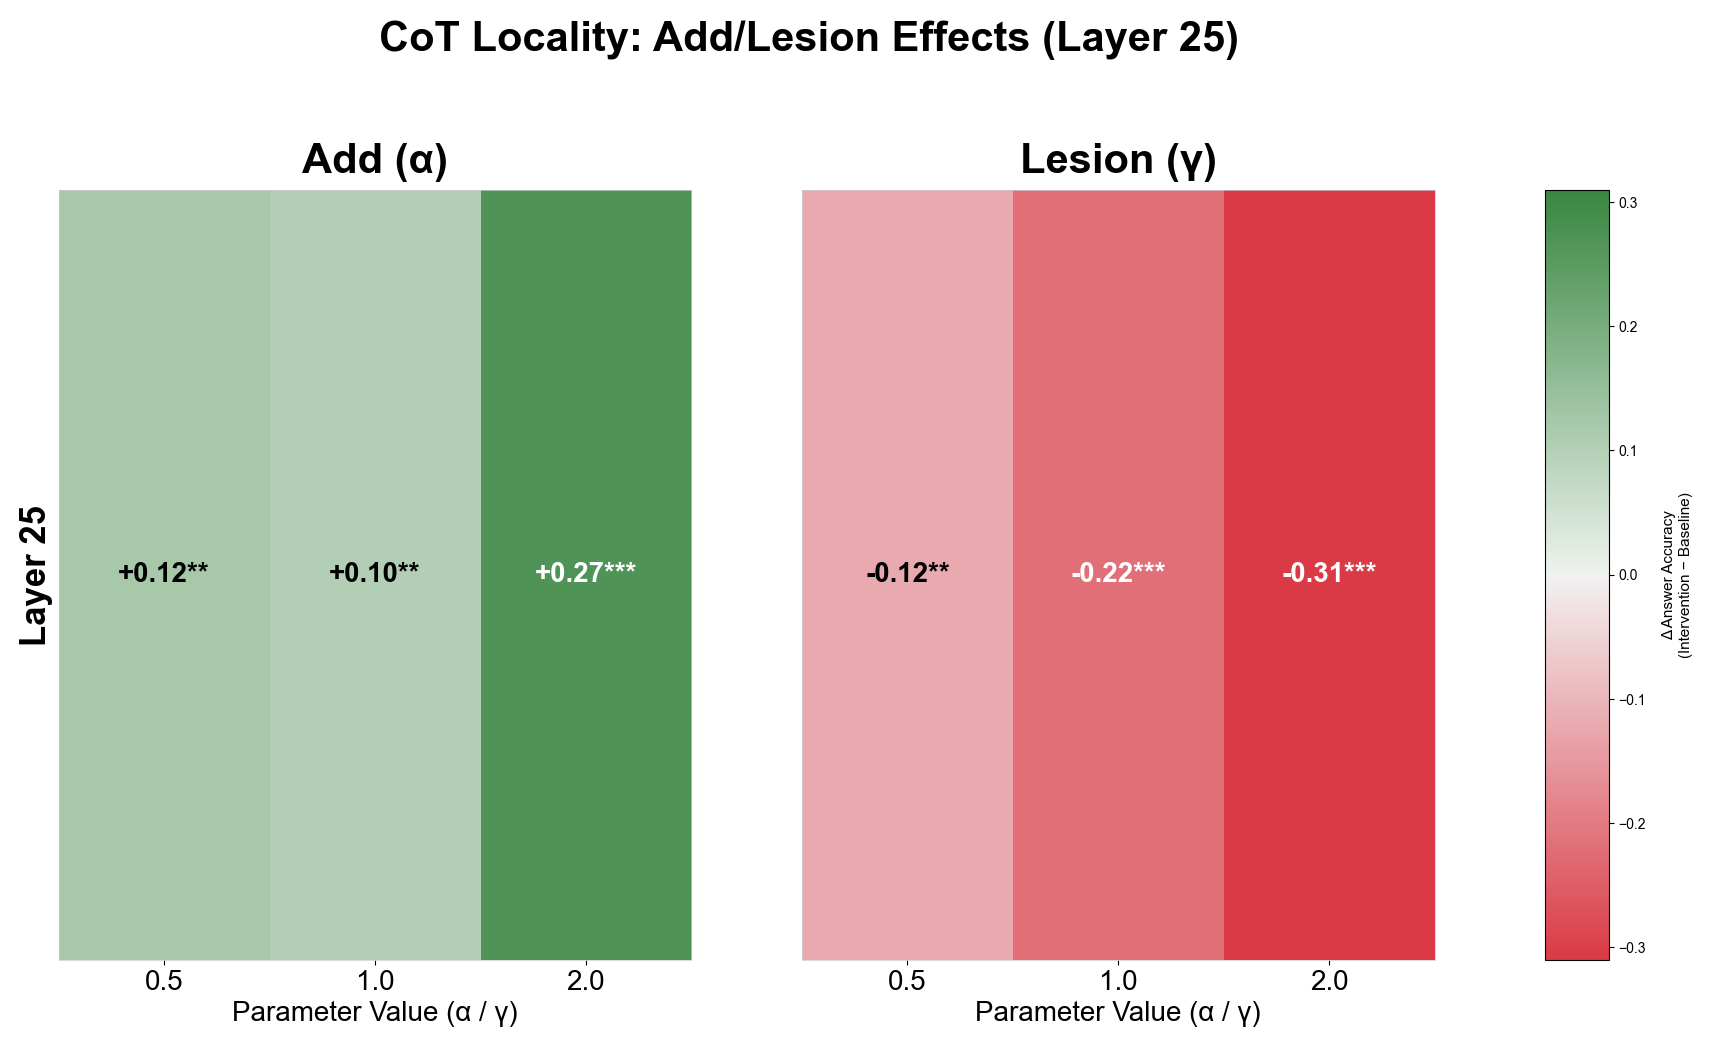

In [40]:
if not paired_stats[paired_stats['locality'] == 'cot'].empty:
    fig_cot_al = plot_add_lesion_grid(
        paired_stats,
        locality='cot',
        layer=25,
        baseline_acc=0.65,
        title='CoT Locality: Add/Lesion Effects (Layer 25)',
        save_path=OUTPUT_DIR / 'mode_comparison_cot_locality.pdf',
    )
    plt.show()
else:
    print("No COT locality data available for Add/Lesion.")

## 5. Answer Locality: Add/Lesion

Saved to ../outputs/phase_b_scaled/mode_comparison_answer_locality.pdf


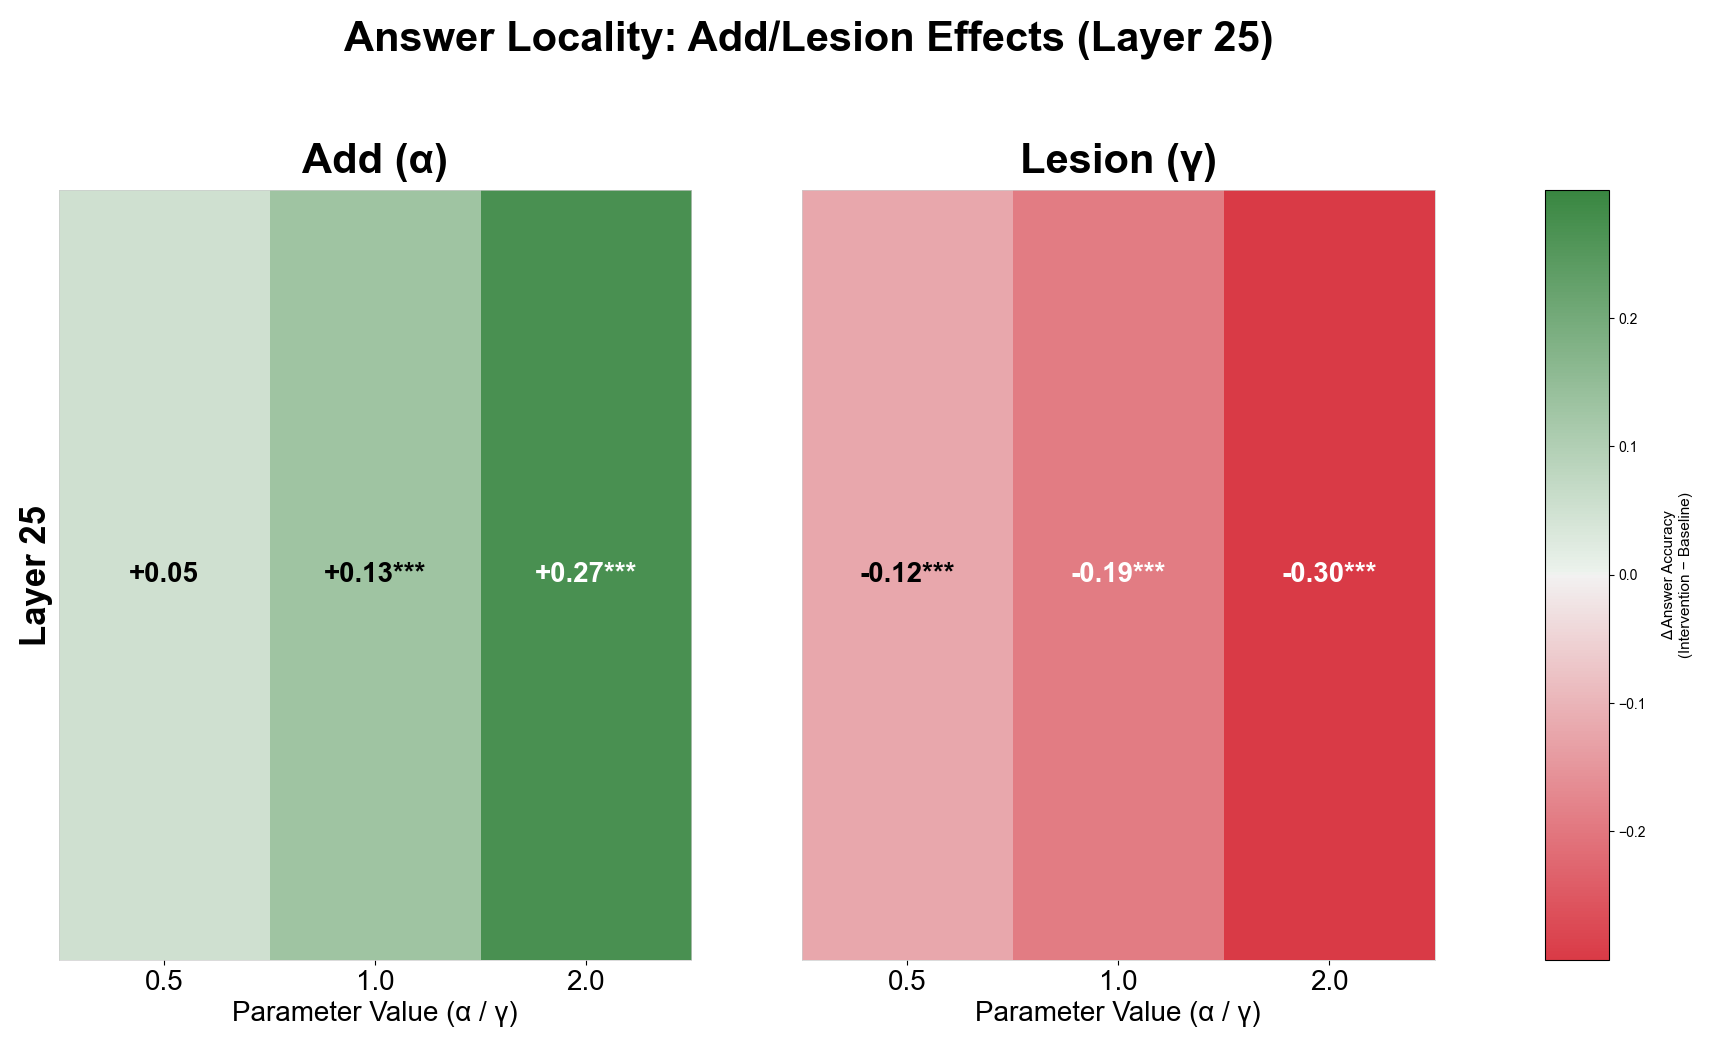

In [41]:
if not paired_stats[paired_stats['locality'] == 'answer'].empty:
    fig_answer_al = plot_add_lesion_grid(
        paired_stats,
        locality='answer',
        layer=25,
        baseline_acc=0.65,
        title='Answer Locality: Add/Lesion Effects (Layer 25)',
        save_path=OUTPUT_DIR / 'mode_comparison_answer_locality.pdf',
    )
    plt.show()
else:
    print("No Answer locality data available for Add/Lesion.")

## 6. COT Locality: Rescue Triplet

Saved to ../outputs/phase_b_scaled/rescue_triplet_cot_locality.pdf


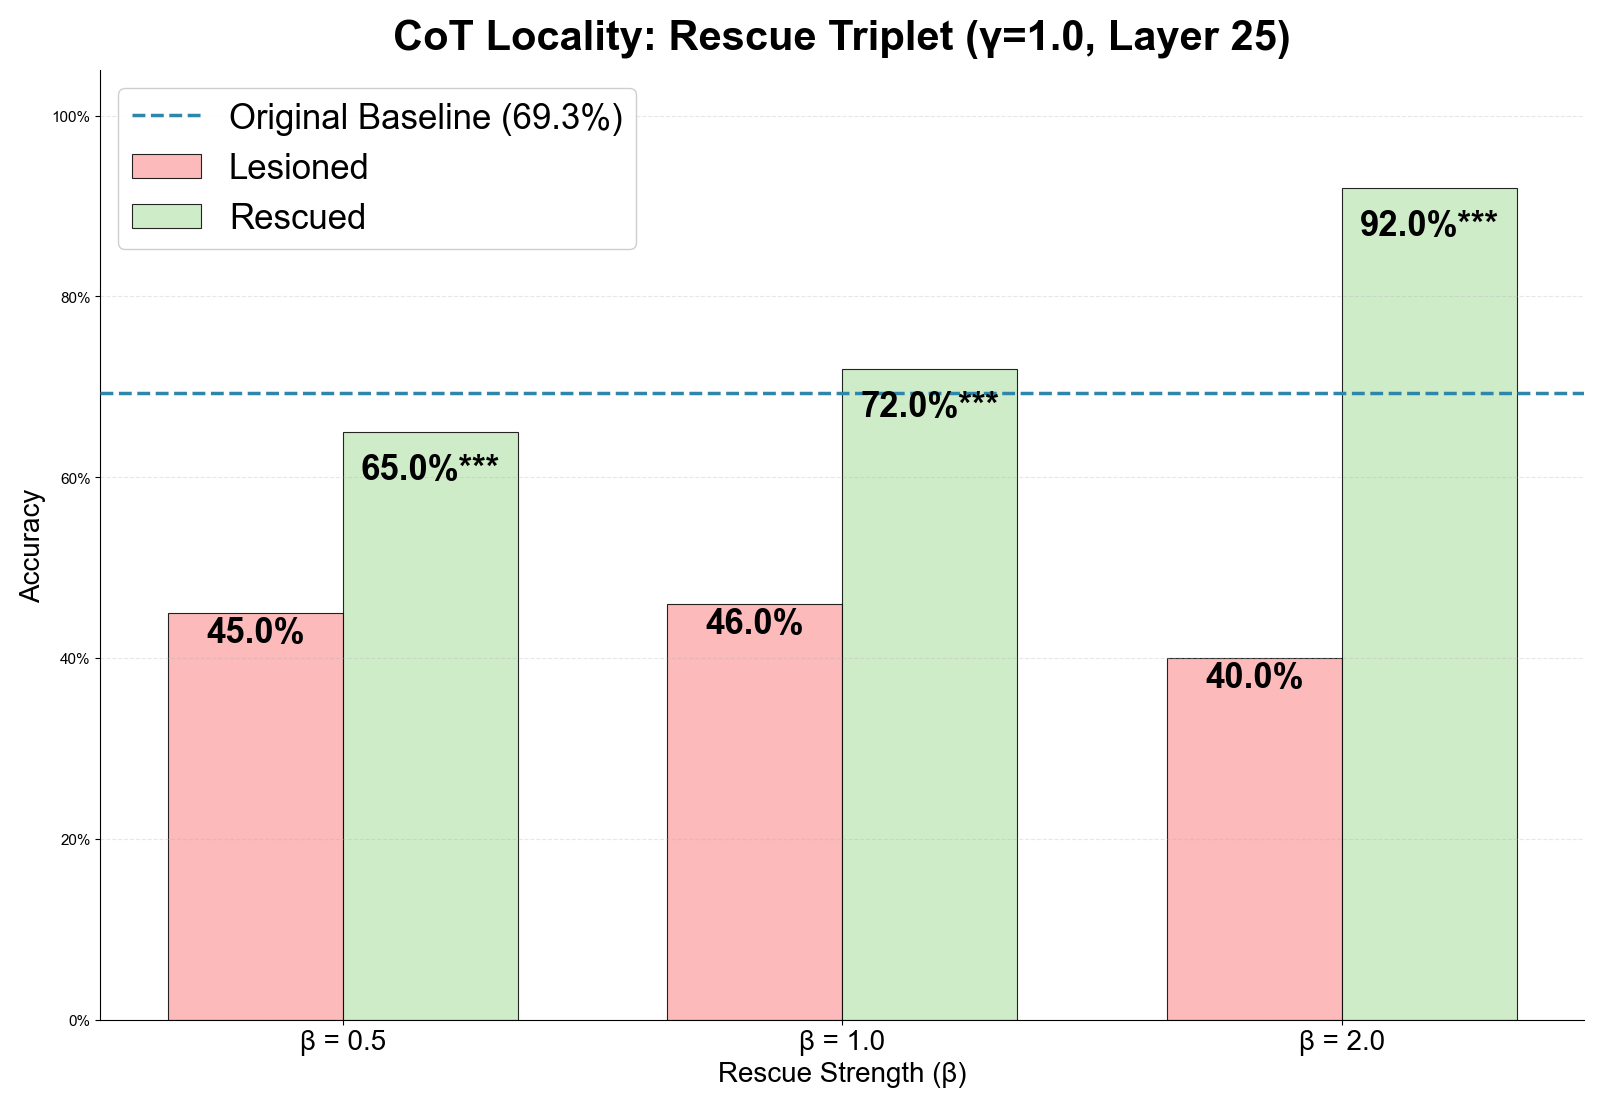

In [49]:
if not rescue_stats.empty and not rescue_stats[rescue_stats['locality'] == 'cot'].empty:
    fig_cot_rescue = plot_rescue_triplet(
        rescue_stats,
        locality='cot',
        baseline_acc=0.65,
        title='CoT Locality: Rescue Triplet (γ=1.0, Layer 25)',
        save_path=OUTPUT_DIR / 'rescue_triplet_cot_locality.pdf',
    )
    plt.show()
else:
    print("No COT locality rescue triplet data available.")

## 7. Answer Locality: Rescue Triplet

Saved to ../outputs/phase_b_scaled/rescue_triplet_answer_locality.pdf


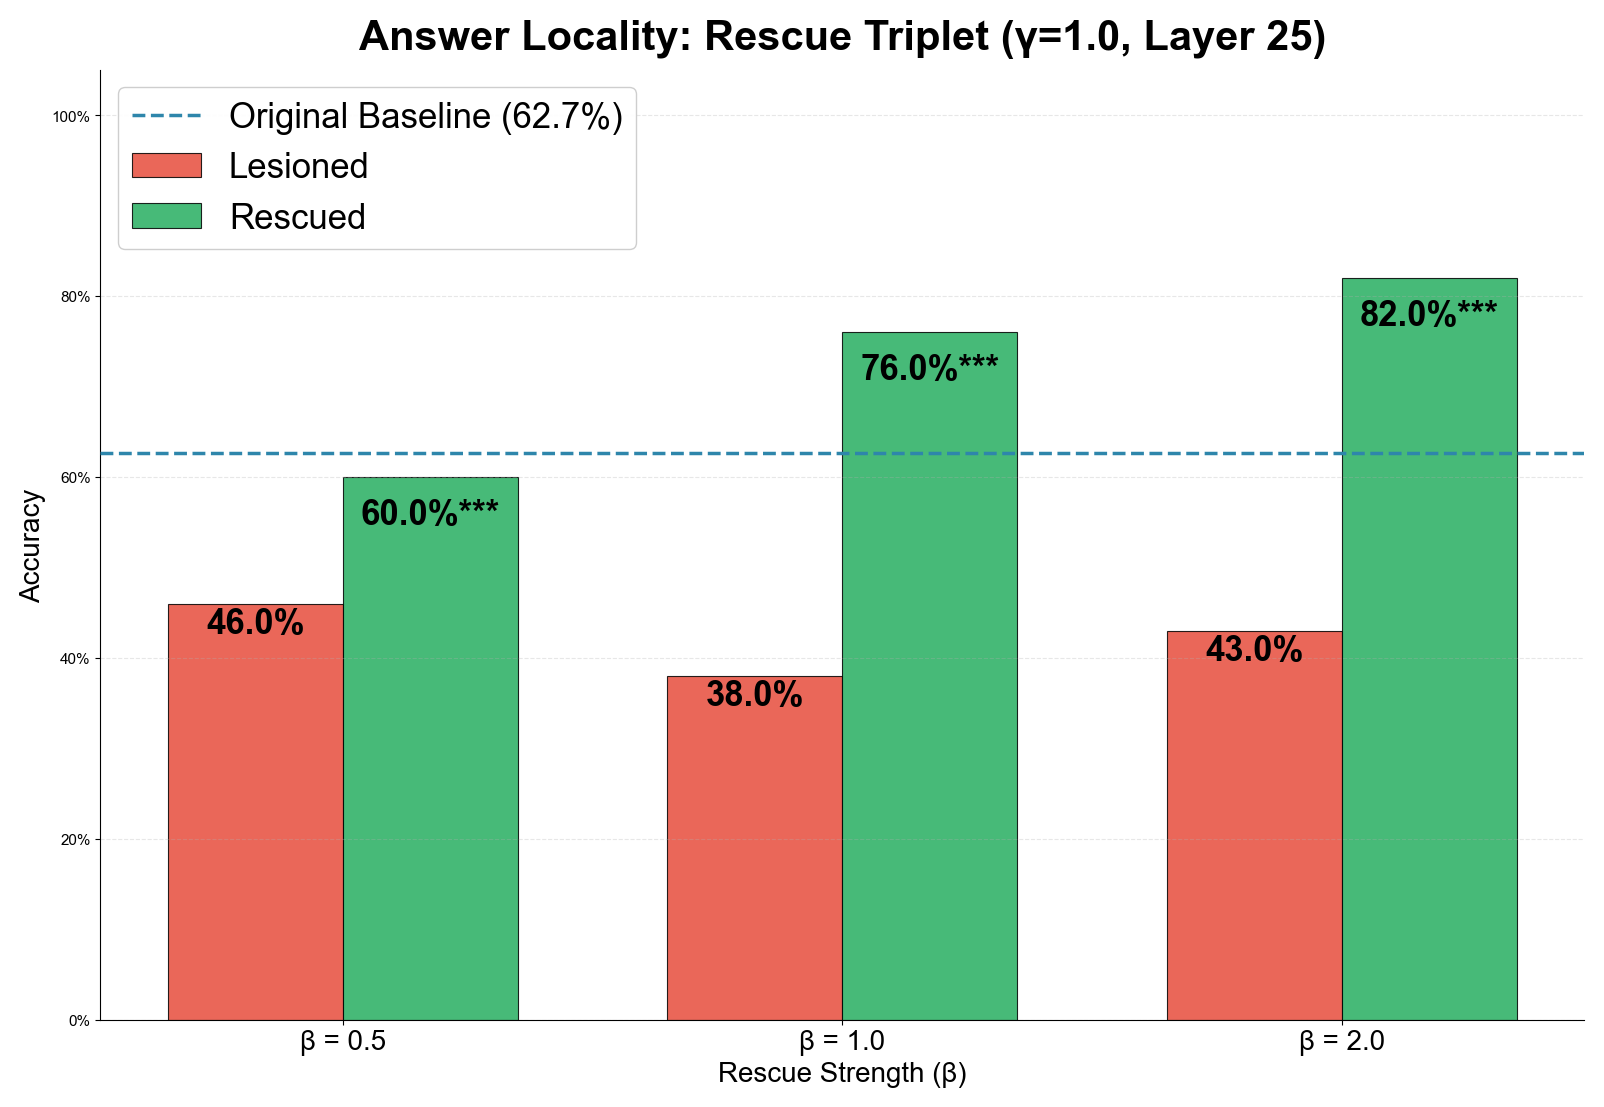

In [43]:
if not rescue_stats.empty and not rescue_stats[rescue_stats['locality'] == 'answer'].empty:
    fig_answer_rescue = plot_rescue_triplet(
        rescue_stats,
        locality='answer',
        baseline_acc=0.65,
        title='Answer Locality: Rescue Triplet (γ=1.0, Layer 25)',
        save_path=OUTPUT_DIR / 'rescue_triplet_answer_locality.pdf',
    )
    plt.show()
else:
    print("No Answer locality rescue triplet data available.")

## 8. Combined Summary Table

In [10]:
print("\n=== Add/Lesion Summary Table ===")
summary_al = paired_stats[['mode', 'param', 'locality', 'delta', 'mcnemar_p']].copy()
summary_al['significant'] = summary_al['mcnemar_p'].apply(
    lambda p: '***' if p < 0.001 else ('**' if p < 0.01 else ('*' if p < 0.05 else ''))
)
summary_al = summary_al.sort_values(['locality', 'mode', 'param'])
display(summary_al)

if not rescue_stats.empty:
    print("\n=== Rescue Triplet Summary Table ===")
    summary_rescue = rescue_stats[['locality', 'param_value', 'acc_original', 'acc_lesion', 'acc_rescue', 'recovery_rate', 'mcnemar_rescue_p']].copy()
    summary_rescue['significant'] = summary_rescue['mcnemar_rescue_p'].apply(
        lambda p: '***' if p < 0.001 else ('**' if p < 0.01 else ('*' if p < 0.05 else ''))
    )
    summary_rescue = summary_rescue.sort_values(['locality', 'param_value'])
    display(summary_rescue)


=== Add/Lesion Summary Table ===


,mode,param,locality,delta,mcnemar_p,significant
0,add,0.5,answer,0.05,1.796875e-01,
1,add,1.0,answer,0.13,9.765625e-04,***
2,add,2.0,answer,0.27,1.117587e-07,***
6,lesion,0.5,answer,-0.12,4.882812e-04,***
7,lesion,1.0,answer,-0.19,3.814697e-06,***
8,lesion,2.0,answer,-0.30,1.862645e-09,***
3,add,0.5,cot,0.12,4.180908e-03,**
4,add,1.0,cot,0.10,6.347656e-03,**
5,add,2.0,cot,0.27,1.490116e-08,***
9,lesion,0.5,cot,-0.12,4.180908e-03,**



=== Rescue Triplet Summary Table ===


,locality,param_value,acc_original,acc_lesion,acc_rescue,recovery_rate,mcnemar_rescue_p,significant
0,answer,0.5,0.66,0.46,0.60,0.700000,5.187988e-04,***
1,answer,1.0,0.59,0.38,0.76,1.809524,7.457857e-11,***
2,answer,2.0,0.63,0.43,0.82,1.950000,2.153229e-10,***
3,cot,0.5,0.74,0.45,0.65,0.689655,1.096725e-05,***
4,cot,1.0,0.70,0.46,0.72,1.083333,8.679926e-07,***
5,cot,2.0,0.64,0.40,0.92,2.166667,4.440892e-16,***


## 9. Interpretation Guide

### Delta Accuracy Definition (Add/Lesion)

**Δ Answer Accuracy = Intervention Accuracy − Baseline Accuracy**

- **Positive Δ**: Intervention improved performance
- **Negative Δ**: Intervention hurt performance
- **Zero Δ**: No change from intervention

### Rescue Triplet Interpretation

| Metric | Description |
|--------|-------------|
| **acc_original** | Performance without intervention (~65%) |
| **acc_lesion** | Performance after lesion (degraded) |
| **acc_rescue** | Performance after lesion + rescue (recovered) |
| **recovery_rate** | (rescue - lesion) / (original - lesion) |
| **mcnemar_rescue_p** | P-value: rescue significantly improves over lesion? |

### Expected Patterns

| Mode | Expected Pattern | Interpretation |
|------|-----------------|----------------|
| Add | Positive, dose-dependent | Reasoning direction is sufficient |
| Lesion | Negative, dose-dependent | Reasoning direction is necessary |
| Rescue | Recovery toward original | Causal mechanism / rescue evidence |

### Statistical Test: McNemar's Test

**Why McNemar's test?**
- Designed for **paired binary outcomes** (correct/incorrect before vs after)
- Tests whether intervention causes **asymmetric changes**
- Non-parametric: no distributional assumptions needed

**Significance thresholds:**
- `*` p < 0.05
- `**` p < 0.01  
- `***` p < 0.001